In [1]:
import requests
import json
import pandas as pd
import numpy as np 

from datetime import datetime, timedelta
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt

import psychrolib # Library for WetBulb estimation 

In [2]:
from utils.download_eia import download_online_data, download_whole_year

## 1. Function to download Fuel Mix data

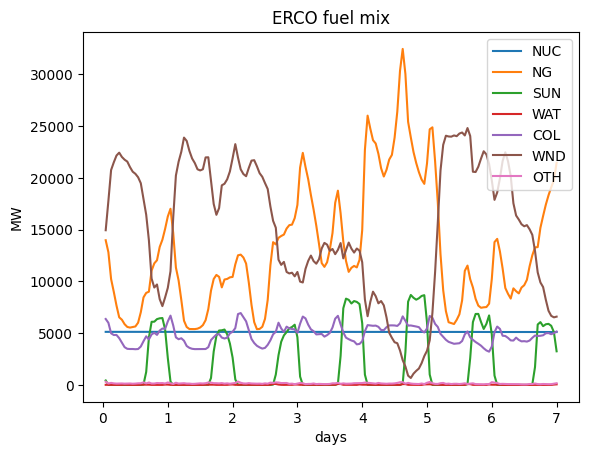

In [3]:
loc_name = "ERCO"
api_key  = None
df  = download_online_data(loc_name, "2023-01-01T00", "2023-01-07T23", 
                           api_key = api_key)

type_list = list(set(df['fueltype']))

for t in type_list:
    plt.plot(np.arange(1,7*24+1)/24, df[df['fueltype'] == t]["value"].values, label=t)

plt.xlabel("days")
plt.ylabel("MW")    
plt.title("{} fuel mix".format(loc_name))
plt.legend(loc="upper right")
plt.show()

## 2. Function to download a whole year data

In [4]:
# Set the year to 2022
year = 2022
region_code = "NW"
df_year = download_whole_year(year, region_code, api_key)

100%|███████████████████████████████████████████| 12/12 [00:28<00:00,  2.38s/it]


In [5]:
print(df_year.shape)
df_year#.to_csv("data/fuelmix/NW_year_2022.csv")

(70080, 7)


,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2022-01-01T00,NW,Northwest,COL,Coal,12022,megawatthours
1,2022-01-01T00,NW,Northwest,NG,Natural gas,8905,megawatthours
2,2022-01-01T00,NW,Northwest,NUC,Nuclear,1158,megawatthours
3,2022-01-01T00,NW,Northwest,OIL,Petroleum,61,megawatthours
4,2022-01-01T00,NW,Northwest,OTH,Other,1023,megawatthours
...,...,...,...,...,...,...,...
70075,2022-12-31T23,NW,Northwest,OIL,Petroleum,58,megawatthours
70076,2022-12-31T23,NW,Northwest,OTH,Other,1006,megawatthours
70077,2022-12-31T23,NW,Northwest,SUN,Solar,843,megawatthours
70078,2022-12-31T23,NW,Northwest,WAT,Hydro,11953,megawatthours
